# Lab 4 - Extraction of subject-verb-object triples

## Objectives
The objectives of this assignment are to:

* Extract the subject–verb pairs from a parsed corpus
* Extend the extraction to subject–verb–object triples
* Understand how dependency parsing can help create a knowledge base
* Write a short report of 1 to 2 pages on the assignment

This assignment is inspired by the Prismatic knowledge base used in the IBM Watson system. See this paper for details.

In this session, you will first use a parsed corpus of Swedish to extract the pairs and triples, and then apply it to other languages.

## Choosing a parsed corpus

#### In this part, you will use the CONLL-X Swedish corpus. Download the tar archives containing the training and test sets for Swedish and uncompress them: [data sets]. 

In [1]:
from urllib.request import urlopen

b_train_text = urlopen("http://fileadmin.cs.lth.se/cs/Education/EDAN20/corpus/conllx/sv/swedish_talbanken05_train.conll").read() # Open file and read
train_text = str(b_train_text,'utf-8')

b_test_text = urlopen("http://fileadmin.cs.lth.se/cs/Education/EDAN20/corpus/conllx/sv/swedish_talbanken05_test_blind.conll").read() # Open file and read
test_text = str(b_test_text,'utf-8')

In [2]:
f_out = open('train_sen.cnoll', 'w')

for sentence in train_text:   
    f_out.write(sentence)
f_out.close()

In [3]:
print(train_text[:550])

1	Äktenskapet	_	NN	NN	_	4	SS	_	_
2	och	_	++	++	_	3	++	_	_
3	familjen	_	NN	NN	_	1	CC	_	_
4	är	_	AV	AV	_	0	ROOT	_	_
5	en	_	EN	EN	_	7	DT	_	_
6	gammal	_	AJ	AJ	_	7	AT	_	_
7	institution	_	NN	NN	_	4	SP	_	_
8	,	_	IK	IK	_	7	IK	_	_
9	som	_	PO	PO	_	10	SS	_	_
10	funnits	_	VV	VV	_	7	ET	_	_
11	sedan	_	PR	PR	_	10	TA	_	_
12	1800-talet	_	NN	NN	_	11	PA	_	_
13	.	_	IP	IP	_	4	IP	_	_

1	Är	_	AV	AV	_	0	ROOT	_	_
2	den	_	PO	PO	_	1	SS	_	_
3	berättigad	_	TP	TP	_	1	SP	_	_
4	i	_	PR	PR	_	1	RA	_	_
5	dagens	_	NN	NN	_	6	DT	_	_
6	samhälle	_	NN	NN	_	4	PA	_	_
7	.	_	IP	IP	_	1	IP	_


#### Draw a graphical representation of the two first sentences of the training set.

#### Download What's wrong with my NLP and use it to check your representations.

First sentence:
Äktenskapet och familjen är en gammal institution, som funnits sedan 1800-talet.

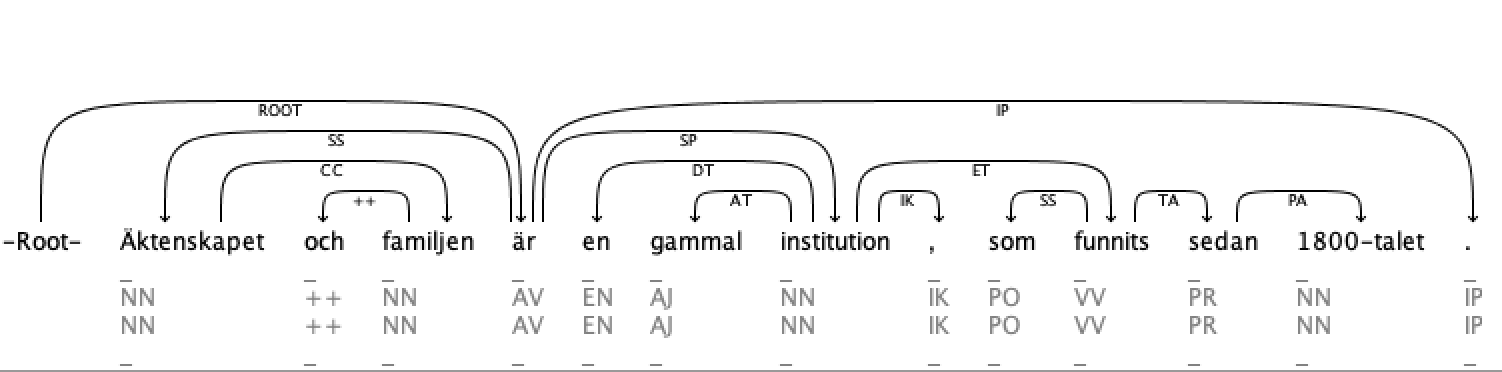

Second sentence: 
Är den berättigad i dagens samälle.

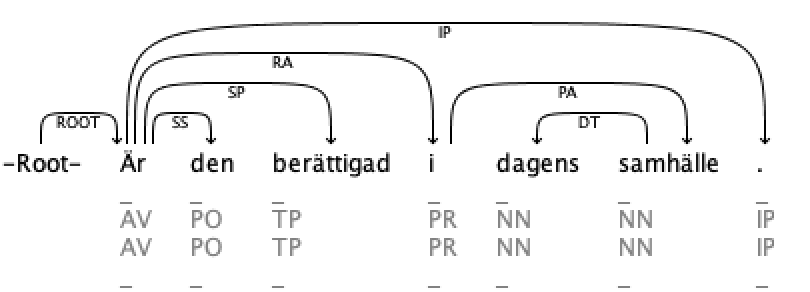

#### Apply the dependency parser for Swedish of the Langforia pipelines to these sentences. Link to Lanforia pipelines: http://vilde.cs.lth.se:9000/

First sentence:

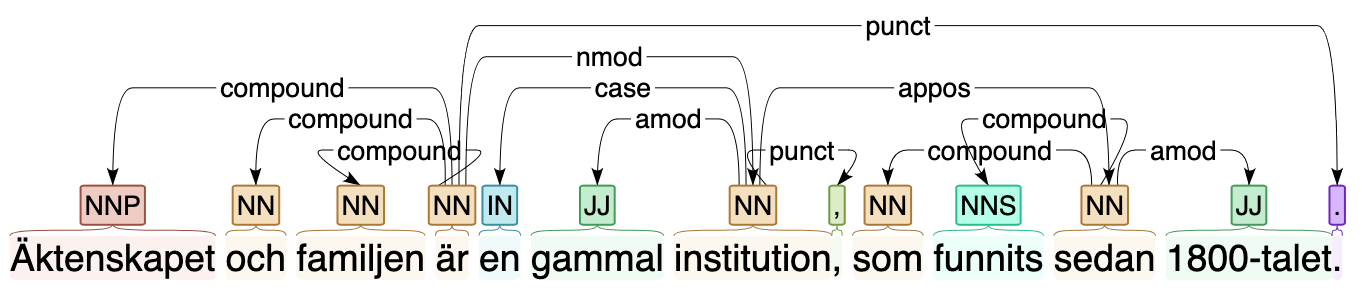

Second sentence:

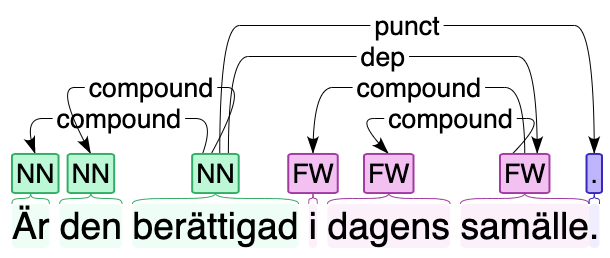

## Extracting the subject–verb pairs

Extract all the subject–verb pairs and the subject–verb–object triples from the training corpus. First get corpus. Based on course code found here: https://github.com/pnugues/ilppp/blob/master/programs/labs/relation_extraction/python/conll.py

Conll tag decription:

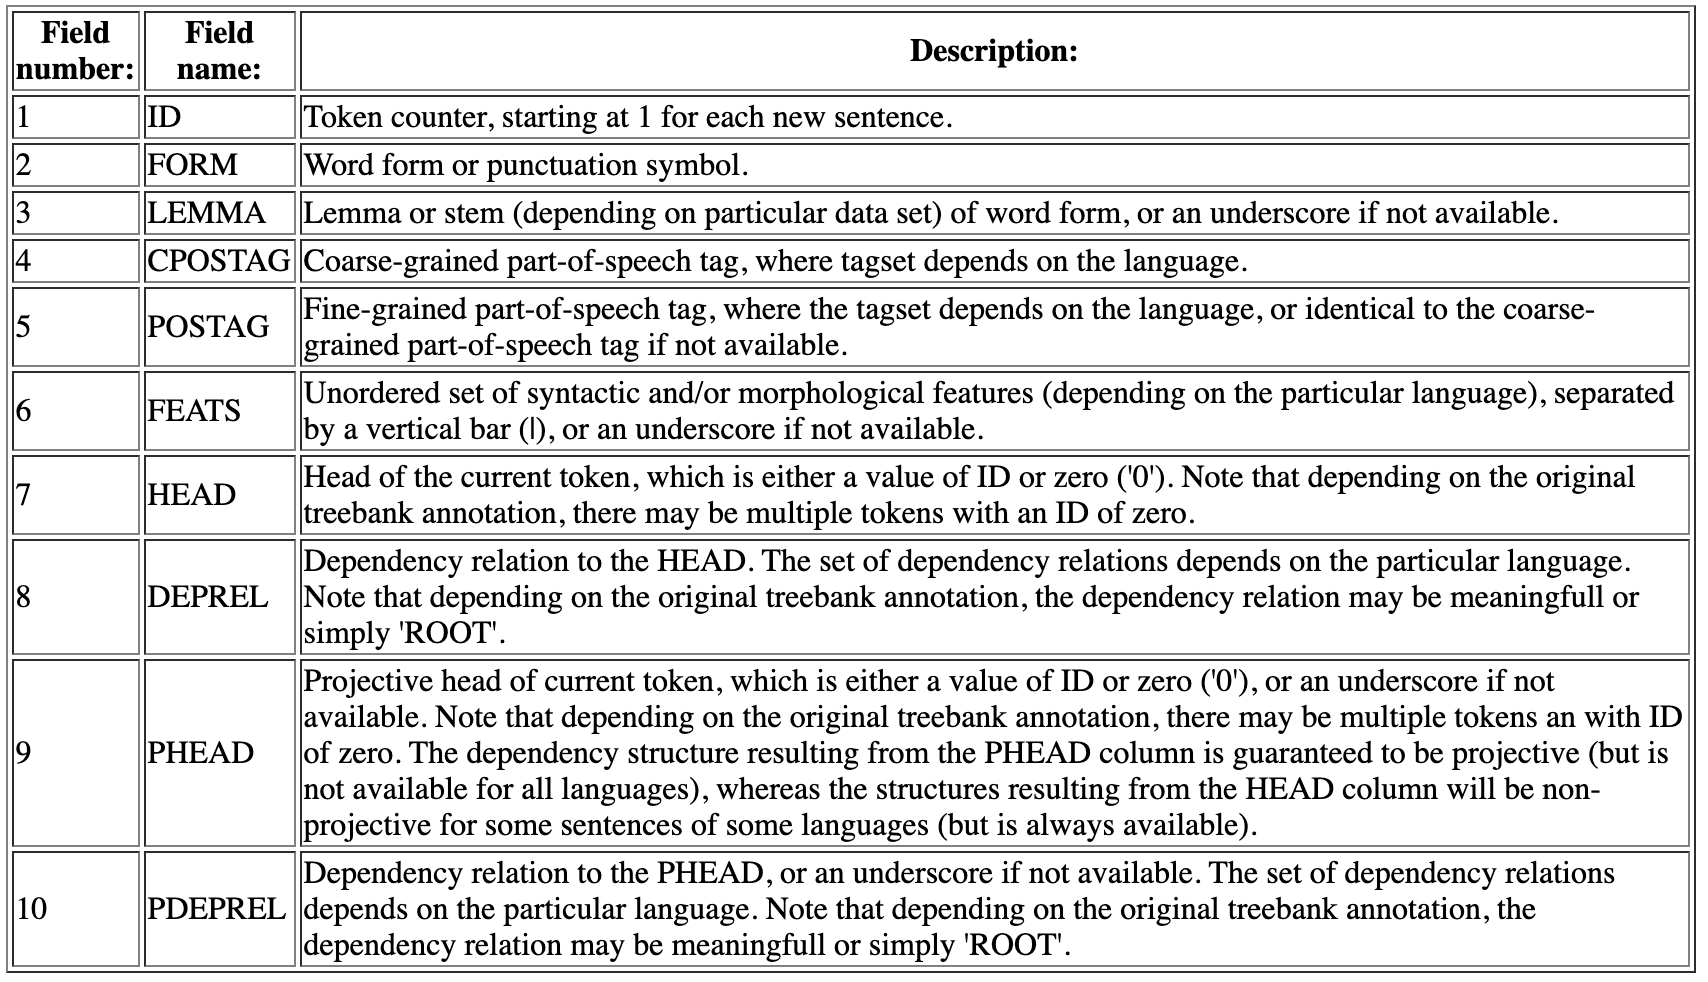

In [4]:
column_names = ['id', 'form', 'lemma', 'cpostag', 'postag', 'feats', 'head', 'deprel', 'phead', 'pdeprel']

#sentences = read_sentences(train_file)
train_text = train_text.strip()
train_sentences = train_text.split('\n\n')

test_text = test_text.strip()
test_sentences = test_text.split('\n\n')

Creates a list of sentence where each sentence is a list of lines, each line is a dictionary of columns.

In [5]:
#formatted_corpus = split_rows(sentences, column_names_2006)
sentences = []
root_values = ['0', 'ROOT', 'ROOT', 'ROOT', 'ROOT', 'ROOT', '0', 'ROOT', '0', 'ROOT']
start = [dict(zip(column_names, root_values))]

for sentence in train_sentences:
    rows = sentence.split('\n')
    sentence = [dict(zip(column_names, row.split('\t'))) for row in rows if row[0] != '#']
    sentence = start + sentence
    sentences.append(sentence)

print(sentences[0][1]) #sentences[mening][ord]

{'id': '1', 'form': 'Äktenskapet', 'lemma': '_', 'cpostag': 'NN', 'postag': 'NN', 'feats': '_', 'head': '4', 'deprel': 'SS', 'phead': '_', 'pdeprel': '_'}


In [6]:
def nsubj_pairs(sentences):
    """
    Returns all subject–verb pairs from ConllX format list
    :param list:
    :return: dict of all subject–verb pairs (keys = tuple)
    """
    nsubj_dict = {}
    for sent in sentences: # Iterate all sentences
        for row in sent: # Iterate each sentence
            deprel_row = row['deprel']
            if deprel_row == 'SS': # If word is subject 
                SS_word_index = row['head']
                SS_word = sent[int(SS_word_index)]['form'].lower()
                NN_word = row['form'].lower()
                if (SS_word,NN_word) in nsubj_dict: # Add to dict
                    nsubj_dict[(SS_word,NN_word)] += 1
                else:
                    nsubj_dict[(SS_word,NN_word)] = 1
    return nsubj_dict
 

In [7]:
nsubj_dict = nsubj_pairs(sentences)

In [8]:
print("Total number of subject–verb pairs found: " + str(sum(list(nsubj_dict.values()))))

Total number of subject–verb pairs found: 18885


In [9]:
import operator
print("The most frequent subject-verbs are: ")

sorted_nsubj_list = sorted(nsubj_dict.items(), key=operator.itemgetter(1))
sorted_nsubj_list[len(sorted_nsubj_list)-5:]

The most frequent subject-verbs are: 


[(('är', 'äktenskapet'), 161),
 (('tror', 'jag'), 171),
 (('är', 'som'), 211),
 (('kan', 'man'), 261),
 (('är', 'det'), 537)]

## Extracting the subject–verb–object triples

Using same training corpus as above.

In [18]:
def nsubjo_triples(sentences):
    """
    Returns all subject–verb pairs from ConllX format list
    :param list:
    :return: dict of all subject–verb pairs (keys = tuple)
    """
    nsubjo_dict = {}
    for sent in sentences: # Iterate all sentences
        for row in sent: # Iterate each sentence
            deprel_row = row['deprel']
            if deprel_row == 'SS': # If word is subject 
                NN_word = row['form'].lower()
                SS_word_index = row['head']
                SS_word = sent[int(SS_word_index)]['form'].lower()
                for row_2 in sent: # Iterate sentence again and look for object
                    deprel_row_2 = row_2['deprel']
                    if deprel_row_2 == 'OO':
                        OO_word = row_2['form'].lower()
                        if row_2['head'] == row['head']: # Is subject and object pointing at same verb?
                            if (SS_word,NN_word,OO_word) in nsubjo_dict: # Add to dict
                                nsubjo_dict[(SS_word,NN_word,OO_word)] += 1
                            else:
                                nsubjo_dict[(SS_word,NN_word,OO_word)] = 1
    return nsubjo_dict

In [19]:
nsubjobj_dict = nsubjo_triples(sentences)

In [20]:
print("Total number of subject–verb-object triples found: " + str(sum(list(nsubjobj_dict.values()))))

Total number of subject–verb-object triples found: 5844


In [21]:
sorted_nsubjo_list = sorted(nsubjobj_dict.items(), key=operator.itemgetter(1))
sorted_nsubjo_list[len(sorted_nsubjo_list)-5:]

[(('ingått', 'som', 'äktenskap'), 17),
 (('vänder', 'man', 'sig'), 19),
 (('tror', 'jag', 'är'), 36),
 (('tycker', 'jag', 'är'), 36),
 (('gifter', 'man', 'sig'), 37)]

## Multilingual Corpora

Applying the model it to all the other languages from Universal Dependencies repository. https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-2988

Read CoNLL-U format:

In [35]:
spanish_path = "corps/ud-treebanks-v2.4/UD_Spanish-AnCora/es_ancora-ud-train.conllu"

spanish_text = open(spanish_path).read()  

In [50]:
print(spanish_text[:3042])

# sent_id = train-s1
# text = El presidente del órgano regulador de las Telecomunicaciones se mostró partidario de completar esta liberalización de las telecomunicaciones con otras medidas que incentiven la competencia como puede ser abrir el acceso a la información de los clientes de Telefónica a otros operadores.
# orig_file_sentence 001#1
1	El	el	DET	DET	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	2	det	_	_
2	presidente	presidente	NOUN	NOUN	Gender=Masc|Number=Sing	10	nsubj	_	_
3	del	del	ADP	ADP	AdpType=Preppron	4	case	_	_
4	órgano	órgano	NOUN	NOUN	Gender=Masc|Number=Sing	2	nmod	_	_
5	regulador	regulador	ADJ	ADJ	Gender=Masc|Number=Sing	4	amod	_	_
6	de	de	ADP	ADP	AdpType=Prep	8	case	_	_
7	las	el	DET	DET	Definite=Def|Gender=Fem|Number=Plur|PronType=Art	8	det	_	_
8	Telecomunicaciones	Telecomunicaciones	PROPN	PROPN	_	4	nmod	_	_
9	se	él	PRON	PRON	Case=Acc,Dat|Person=3|PrepCase=Npr|PronType=Prs|Reflex=Yes	10	obj	_	_
10	mostró	mostrar	VERB	VERB	Mood=Ind|Number=Sing|Person=3|Tense=Past

In [51]:
def txt_to_conllu(text, column_names, root_values = ['0', 'ROOT', 'ROOT', 'ROOT', 'ROOT', 'ROOT', '0', 'ROOT', '0', 'ROOT']):
    text = text.strip()
    text_sentences = text.split('\n\n')
    
    sentences = []
    start = [dict(zip(column_names, root_values))]
    for sentence in text_sentences:
        rows = sentence.split('\n')
        sentence = [dict(zip(column_names, row.split('\t'))) for row in rows if row[0] != '#']
        sentence = start + sentence
        sentences.append(sentence)
        
    return sentences

In [52]:
column_names = ['id', 'form', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc']

corpus_dict = txt_to_conllu(spanish_text, column_names)

print(corpus_dict[0][1]) #sentences[mening][ord]

{'id': '1', 'form': 'El', 'lemma': 'el', 'upos': 'DET', 'xpos': 'DET', 'feats': 'Definite=Def|Gender=Masc|Number=Sing|PronType=Art', 'head': '2', 'deprel': 'det', 'deps': '_', 'misc': '_'}
